#Importing Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/archive/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3125 files belonging to 36 classes.


In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/archive/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


In [5]:
cnn = tf.keras.models.Sequential()

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [10]:
cnn.add(tf.keras.layers.Flatten())

In [11]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [12]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [14]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))


In [15]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        36928     
                                                        

In [17]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 [==============================] - 751s 7s/step - loss: 6.3891 - accuracy: 0.0278 - val_loss: 3.5714 - val_accuracy: 0.0570
Epoch 2/32
98/98 [==============================] - 150s 1s/step - loss: 3.5447 - accuracy: 0.0442 - val_loss: 3.5151 - val_accuracy: 0.0627
Epoch 3/32
98/98 [==============================] - 156s 2s/step - loss: 3.3826 - accuracy: 0.0822 - val_loss: 3.0741 - val_accuracy: 0.2194
Epoch 4/32
98/98 [==============================] - 151s 1s/step - loss: 3.1498 - accuracy: 0.1395 - val_loss: 2.5915 - val_accuracy: 0.3818
Epoch 5/32
98/98 [==============================] - 149s 1s/step - loss: 2.8495 - accuracy: 0.1930 - val_loss: 2.0935 - val_accuracy: 0.5128
Epoch 6/32
98/98 [==============================] - 150s 1s/step - loss: 2.5648 - accuracy: 0.2698 - val_loss: 1.6534 - val_accuracy: 0.6638
Epoch 7/32
98/98 [==============================] - 153s 1s/step - loss: 2.2345 - accuracy: 0.3539 - val_loss: 1.2257 - val_accuracy: 0.7208
Epoch 8/32
98

In [18]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 [==============================] - 95s 890ms/step - loss: 0.0522 - accuracy: 0.9843
Training accuracy: 0.9843199849128723


In [19]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)


11/11 [==============================] - 13s 355ms/step - loss: 0.3062 - accuracy: 0.9544
Validation accuracy: 0.9544159770011902


In [21]:
cnn.save('trained_model.h5')

In [22]:
training_history.history #Return Dictionary of history

{'loss': [6.389057636260986,
  3.5447139739990234,
  3.3826475143432617,
  3.1497764587402344,
  2.8494863510131836,
  2.5647599697113037,
  2.2345094680786133,
  1.9477062225341797,
  1.5908504724502563,
  1.3293616771697998,
  1.182505488395691,
  0.979205846786499,
  0.9309558868408203,
  0.7468839883804321,
  0.693822979927063,
  0.6586694717407227,
  0.5667358040809631,
  0.5080991387367249,
  0.4693853259086609,
  0.4048808515071869,
  0.4349796772003174,
  0.41270411014556885,
  0.34877288341522217,
  0.3059004545211792,
  0.3118925094604492,
  0.27534714341163635,
  0.275269478559494,
  0.31405603885650635,
  0.3305019438266754,
  0.2879987359046936,
  0.20324991643428802,
  0.22952036559581757],
 'accuracy': [0.02783999964594841,
  0.04416000097990036,
  0.08224000036716461,
  0.13952000439167023,
  0.1929599940776825,
  0.26976001262664795,
  0.35392001271247864,
  0.43615999817848206,
  0.5318400263786316,
  0.6083199977874756,
  0.6681600213050842,
  0.7177600264549255,
  0

In [23]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [24]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [25]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 95.44159770011902 %


In [26]:
#training_history.history['accuracy']

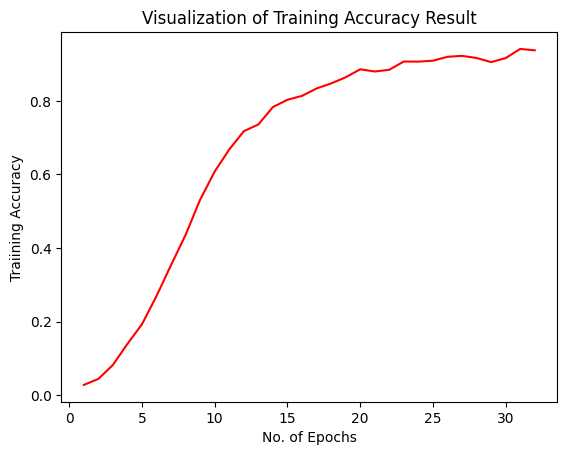

In [27]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

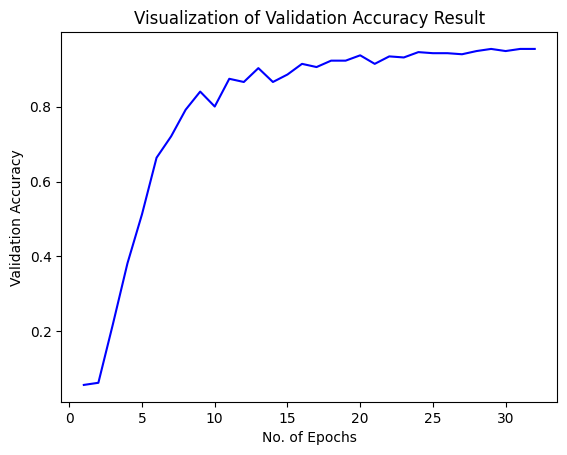

In [28]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

In [29]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/archive/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [30]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 [==============================] - 65s 1s/step - loss: 0.2994 - accuracy: 0.9554
Test accuracy: 0.9554317593574524
